<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Reddit

# Contents:
- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Exploratory Data Analysis, Cleaning, and Feature Engineering](#EDA-and-Cleaning)

# Problem Statement

HelloFrezh is launching new food plans to cater to Keto and Vegan diets. They want to build a marketing plan and create a slogan that aligns with each diet community. We will explore the titles and posts from keto and vegan subreddits to determine what language is more likely to be used in each community and test if it is possible to get accurate classifications for each slogan before launching. Success will be defined by the accuracy score and proper classification of a given slogan.

# Background

HelloFrezh is a meal delivery kit service that offers food plans for different lifestyles but now wants to target different diets, including ketogenic and vegan diets. Keto is a high fat, moderate protein, and low carbohydrate diet that forces the body to use fat as its main energy source instead of carbohydrates. Most people go on this diet for weight loss purposes but sometimes doctors prescribe it to children with epilepsy. Veganism is the practice of abstaining from all animal products including eggs and dairy. It is a plant based lifestyle and typically is followed for nutritional, religious, ethical, and/or environmental purpose. If you want to learn more about either diet, click [here](https://www.eatingwell.com/article/7874433/vegan-vs-keto-how-do-these-two-diets-compare/).

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
keto_url = 'https://api.pushshift.io/reddit/search/submission/?subreddit=keto'

keto_posts = "https://api.pushshift.io/reddit/search/submission/?subreddit=keto&metadata=true&size=0"
print(keto_posts)

keto_text = "https://api.pushshift.io/reddit/search/submission/?subreddit=keto&metadata=true&size=0&is_self=true"
keto_text

https://api.pushshift.io/reddit/search/submission/?subreddit=keto&metadata=true&size=0


'https://api.pushshift.io/reddit/search/submission/?subreddit=keto&metadata=true&size=0&is_self=true'

**Above**: Keto has 34,8346 posts of which 32,8688 are text 

In [3]:
vegan_url = 'https://api.pushshift.io/reddit/search/submission/?subreddit=vegan'

vegan_posts = "https://api.pushshift.io/reddit/search/submission/?subreddit=vegan&metadata=true&size=0"
print(vegan_posts)

vegan_text = "https://api.pushshift.io/reddit/search/submission/?subreddit=vegan&metadata=true&size=0&is_self=true"
vegan_text

https://api.pushshift.io/reddit/search/submission/?subreddit=vegan&metadata=true&size=0


'https://api.pushshift.io/reddit/search/submission/?subreddit=vegan&metadata=true&size=0&is_self=true'

**Above**: Vegan has 380,248 posts of which 164,565 are text 

# EDA and Cleaning

## KETO 

In [4]:
keto_params = {
    'subreddit' : 'keto',
    'size': 100,
    'before': 1651016308
}

res1 = requests.get(keto_url + 'submission/', params = keto_params)
res1.status_code

200

In [5]:
data1 = res1.json()
df1 = pd.DataFrame(data1['data'])
df1['subreddit'] = 'keto'
keto = df1[['subreddit','title','selftext', 'created_utc']]
# keto.to_csv('data/keto.csv', index=False)

In [6]:
# for i in range(60):
#     keto = pd.read_csv('data/keto.csv')
#     params = {'subreddit': 'keto', 'size': 100, 'before': keto['created_utc'].min()}
#     res = requests.get(keto_url + 'submission/', params=params)
#     if res.status_code == 200:
#         keto_data1 = res.json()
#         keto_data1 = pd.DataFrame(keto_data1['data'])
#         keto_data1['subreddit'] = 'keto'
#         keto_data1 = keto_data1[['subreddit','title','selftext', 'created_utc']]
#         keto = pd.concat([keto,keto_data1])
#         keto.to_csv('data/keto.csv', index=False)
#     time.sleep(5)

Created a for loop to gather data from keto subreddit. Ran the loop 60 times gathering 100 values at a time each collect the last 100 values.

In [7]:
keto = pd.read_csv('data/keto.csv')

In [8]:
keto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    6100 non-null   object
 1   title        6100 non-null   object
 2   selftext     6055 non-null   object
 3   created_utc  6100 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 190.8+ KB


In [9]:
keto.sort_values(ascending=False, by='selftext').head()

,subreddit,title,selftext,created_utc
2586,keto,Husband says I eat too much beef...,😂 and it's probably true. I absolutely love st...,1647200204
2425,keto,two weeks keto!,two weeks ago i decided to give keto a try in ...,1647439343
3989,keto,What if I eat low carb (max is 150g) but am no...,to anyone who has anyone done that did you fel...,1645200202
3686,keto,PSA: Kim Chi may be a possible solution to fee...,"tl;dr: read the title. For further info, read ...",1645632526
2625,keto,i love eating fats.,the euphoria i feel after eating a meal high i...,1647146119


In [10]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

#from https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [11]:
keto.dropna(subset=['selftext'],inplace=True)

keto = keto[keto['selftext'] != '[removed]']
keto.dropna(inplace=True)

list_list1 = [a.split('\n') for a in keto['title']]
list_string1 = [''.join(b) for b in list_list1]
keto['title'] = list_string1

list_list2 = [c.split('\n') for c in keto['selftext']]
list_string2 = [''.join(d) for d in list_list2]
keto['selftext'] = list_string2

emoji_list1 = [remove_emojis(i) for i in keto['title']]
keto['title'] = emoji_list1

emoji_list2 = [remove_emojis(j) for j in keto['selftext']]
keto['selftext'] = emoji_list2

keto['title_posts'] = keto['title'] + keto['selftext']

keto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3550 entries, 1 to 6098
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    3550 non-null   object
 1   title        3550 non-null   object
 2   selftext     3550 non-null   object
 3   created_utc  3550 non-null   int64 
 4   title_posts  3550 non-null   object
dtypes: int64(1), object(4)
memory usage: 166.4+ KB


**Cleaned data by dropping null values from selftext column, deleting posts that were marked as removed, separating conjoined lines, removing emojis, and feature engineered a column that combined titles and posts which reduced DataFrame to 3,550 entries**

#### Top 25 Common Words in Keto Titles

In [12]:
cv_keto = CountVectorizer(stop_words='english', ngram_range=(1,2), strip_accents='unicode', min_df=3)
cv_keto_title = cv_keto.fit_transform(keto['title'])
cv_keto_titles = pd.DataFrame(cv_keto_title.toarray(),columns=cv_keto.get_feature_names_out())
top25_keto_titles = cv_keto_titles.sum().sort_values(ascending=False).head(25)
top25_keto_titles.index

Index(['keto', 'weight', 'diet', 'carbs', 'help', 'fat', '2022', 'question',
       'carb', 'low', 'ketosis', 'does', 'eating', 'amp', 'need', 'loss',
       'keto diet', 'protein', 'eat', 'meal', 'food', 'blood', 'day', 'week',
       'sugar'],
      dtype='object')

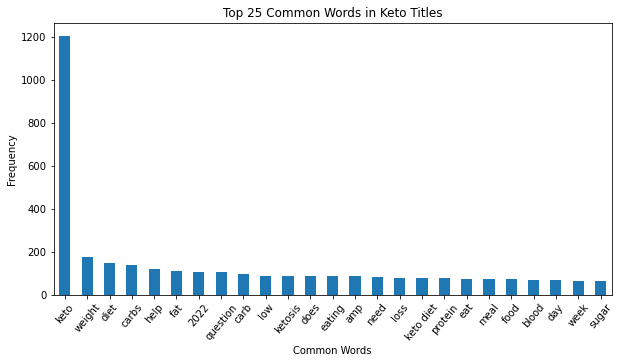

In [13]:
plt.figure(figsize=(10,5))
top25_keto_titles.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words in Keto Titles')
plt.savefig('figures/Top_25_Keto_Titles.png');

**Interpretation**: Keto is the most used word in the titles in the keto subreddit

#### Top 25 Common Words in Keto Posts

In [14]:
cv_keto_post = cv_keto.fit_transform(keto['selftext'])
cv_keto_posts = pd.DataFrame(cv_keto_post.toarray(),columns=cv_keto.get_feature_names_out())
top25_keto_posts = cv_keto_posts.sum().sort_values(ascending=False).head(25)
top25_keto_posts.index

Index(['keto', 'just', 've', 'weight', 'like', 'day', 'carbs', 'diet', 'eat',
       'time', 'eating', 'fat', 'don', 'feel', 'know', 'week', 'started',
       'really', 'doing', 'days', 'carb', 'want', 'good', 'lost', 'low'],
      dtype='object')

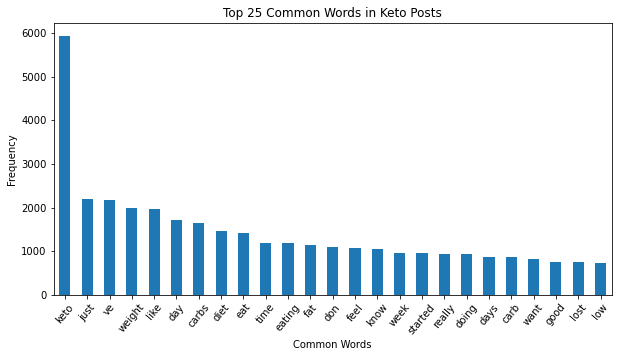

In [15]:
plt.figure(figsize=(10,5))
top25_keto_posts.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words in Keto Posts')
plt.savefig('figures/Top_25_Keto_Posts.png');

**Interpretation**: Keto is the most used word in the posts in the keto subreddit

#### Top 25 Common Words between Keto Posts and Titles

In [16]:
cv_keto_title_posts = cv_keto.fit_transform(keto['title_posts'])
cv_keto_title_posts = pd.DataFrame(cv_keto_title_posts.toarray(),columns=cv_keto.get_feature_names_out())
top25_keto_titles_posts = cv_keto_title_posts.sum().sort_values(ascending=False).head(25)
top25_keto_titles_posts.index

Index(['keto', 'just', 've', 'weight', 'like', 'carbs', 'day', 'diet', 'eat',
       'eating', 'time', 'fat', 'don', 'feel', 'know', 'week', 'doing',
       'really', 'carb', 'started', 'days', 'want', 'low', 'good', 'lost'],
      dtype='object')

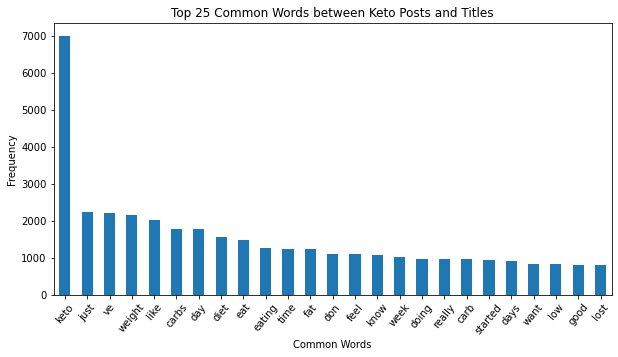

In [17]:
plt.figure(figsize=(10,5))
top25_keto_titles_posts.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words between Keto Posts and Titles')
plt.savefig('figures/Top_25_Keto_Posts_Titles.png');

**Interpretation**: Keto is the most used word between the titles and posts in the keto subreddit

## VEGAN

In [18]:
vegan_params = {
    'subreddit' : 'crossfit',
    'size': 100
}

res2 = requests.get(vegan_url + 'submission/', params = vegan_params)
res2.status_code

200

In [19]:
data2 = res2.json()
df2 = pd.DataFrame(data2['data'])
df2['subreddit'] = 'vegan'
vegan = df2[['subreddit','title','selftext', 'created_utc']]
# vegan.to_csv('data/vegan.csv', index=False)

In [20]:
# for i in range(120):
#     vegan = pd.read_csv('data/vegan.csv')
#     params = {'subreddit': 'vegan', 'size': 100, 'before': vegan['created_utc'].min()}
#     res = requests.get(vegan_url + 'submission/', params=params)
#     if res.status_code == 200:
#         vegan_data1 = res.json()
#         vegan_data1 = pd.DataFrame(vegan_data1['data'])
#         vegan_data1['subreddit'] = 'vegan'
#         vegan_data1 = vegan_data1[['subreddit','title','selftext', 'created_utc']]
#         vegan = pd.concat([vegan,vegan_data1])
#         vegan.to_csv('data/vegan.csv', index=False)
#     time.sleep(5)

Created a for loop to gather data from keto subreddit. Ran the loop 120 times gathering 100 values at a time each collect the last 100 values. I ran this twice as much as the keto subreddit because there were more subreddits removed.

In [21]:
vegan = pd.read_csv('data/vegan.csv')

In [22]:
vegan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12096 entries, 0 to 12095
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    12096 non-null  object
 1   title        12096 non-null  object
 2   selftext     6193 non-null   object
 3   created_utc  12096 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 378.1+ KB


In [23]:
vegan.sort_values(ascending=False, by='selftext').head()

,subreddit,title,selftext,created_utc
9455,vegan,Can you help us improve our solution to food w...,"💥 Hello everyone, we are three young Italians ...",1644581722
10814,vegan,I'm a VERY picky pescetarian who would like to...,👋 Hello!! I've been a pescetarian for about 8i...,1643748662
3893,vegan,荷爾德林,而海德格爾說，荷爾德林是“詩人的詩人”。他們倆之間的惺惺相惜，給了我們這一代人，一些“語言上...,1648367549
7876,vegan,what age were you when you realized you could ...,…i genuinely wish i had people around me who *...,1645567912
10021,vegan,is Erin Janus okay?,you may know her from her dairy is scary video...,1644253046


In [24]:
vegan = vegan[vegan['selftext'] != '[removed]']
vegan.dropna(inplace=True)

list_list3 = [e.split('\n') for e in vegan['title']]
list_string3 = [''.join(f) for f in list_list3]
vegan['title'] = list_string3

list_list4 = [g.split('\n') for g in vegan['selftext']]
list_string4 = [''.join(h) for h in list_list4]
vegan['selftext'] = list_string4

emoji_list3 = [remove_emojis(x) for x in vegan['title']]
vegan['title'] = emoji_list3

emoji_list4 = [remove_emojis(y) for y in vegan['selftext']]
vegan['selftext'] = emoji_list4

vegan['title_posts'] =  vegan['title'] +  vegan['selftext']
    
vegan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 1 to 12095
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    3170 non-null   object
 1   title        3170 non-null   object
 2   selftext     3170 non-null   object
 3   created_utc  3170 non-null   int64 
 4   title_posts  3170 non-null   object
dtypes: int64(1), object(4)
memory usage: 148.6+ KB


**Cleaned data by dropping null values from selftext column, deleting posts that were marked as removed, separating conjoined lines, removing emojis, and feature engineered a column that combined titles and posts which reduced DataFrame to 3,170 entries**

#### Top 25 Common Words in Vegan Titles

In [25]:
cv_vegan = CountVectorizer(stop_words='english', ngram_range=(1,1), strip_accents='unicode', min_df=5)
cv_vegan_title = cv_vegan.fit_transform(vegan['title'])
cv_vegan_titles = pd.DataFrame(cv_vegan_title.toarray(),columns=cv_vegan.get_feature_names_out())
top25_vegan_titles = cv_vegan_titles.sum().sort_values(ascending=False).head(25)
top25_vegan_titles.index

Index(['vegan', 'meat', 'veganism', 'vegans', 'animal', 'help', 'people',
       'food', 'just', 'need', 'non', 'eat', 'like', 'animals', 'eating',
       'does', 'diet', 'question', 'going', 'good', 'feel', 'think', 'milk',
       'new', 'products'],
      dtype='object')

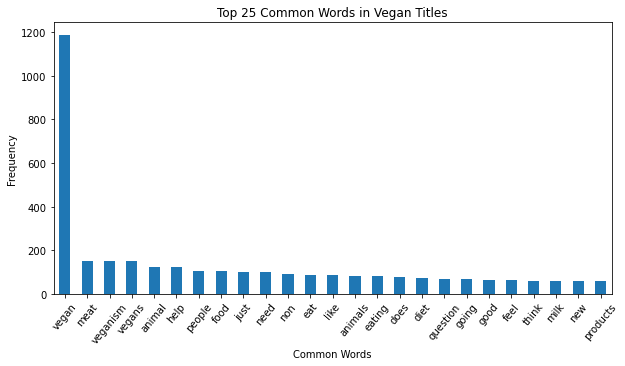

In [26]:
plt.figure(figsize=(10,5))
top25_vegan_titles.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words in Vegan Titles')
plt.savefig('figures/Top_25_Vegan_Titles.png');

**Interpretation**: Vegan is the most used word in the titles in the vegan subreddit

#### Top 25 Common Words in Vegan Posts

In [27]:
cv_vegan_post = cv_vegan.fit_transform(vegan['selftext'])
cv_vegan_posts = pd.DataFrame(cv_vegan_post.toarray(),columns=cv_vegan.get_feature_names_out())
top25_vegan_posts = cv_vegan_posts.sum().sort_values(ascending=False).head(25)
top25_vegan_posts.index

Index(['vegan', 'just', 'like', 'don', 've', 'meat', 'people', 'know', 'https',
       'eat', 'animal', 'animals', 'food', 'really', 'want', 'com', 'think',
       'feel', 'make', 'amp', 'eating', 'time', 'www', 'good', 'veganism'],
      dtype='object')

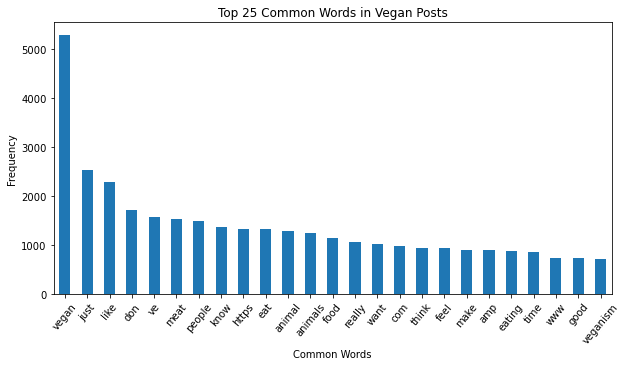

In [28]:
plt.figure(figsize=(10,5))
top25_vegan_posts.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words in Vegan Posts')
plt.savefig('figures/Top_25_Vegan_Posts.png');

**Interpretation**: Vegan is the most used word in the posts in the vegan subreddit

#### Top 25 Common Words between Vegan Posts and Titles

In [29]:
cv_vegan_post_titles = cv_vegan.fit_transform(vegan['title_posts'])
cv_vegan_posts_titles = pd.DataFrame(cv_vegan_post_titles.toarray(),columns=cv_vegan.get_feature_names_out())
top25_vegan_posts_titles = cv_vegan_posts_titles.sum().sort_values(ascending=False).head(25)
top25_vegan_posts_titles.index

Index(['vegan', 'just', 'like', 'don', 'meat', 've', 'people', 'know',
       'animal', 'eat', 'animals', 'https', 'food', 'really', 'want', 'think',
       'feel', 'com', 'eating', 'make', 'amp', 'time', 'veganism', 'good',
       'vegans'],
      dtype='object')

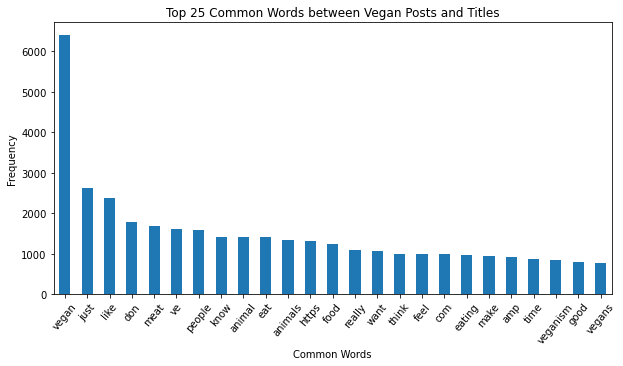

In [30]:
plt.figure(figsize=(10,5))
top25_vegan_posts_titles.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words between Vegan Posts and Titles')
plt.savefig('figures/Top_25_Vegan_Posts_Titles.png');

**Interpretation**: Vegan is the most used word between the titles and posts in the vegan subreddit

## KETO AND VEGAN COMBINED

In [31]:
keto_vegan = pd.concat([keto,vegan])

In [32]:
keto_vegan['title_length'] = [len(i) for i in keto_vegan['title']]

In [33]:
keto_vegan['post_length'] = [len(i) for i in keto_vegan['selftext']]

**Combined keto and vegan dataframes and featured engineered columns to explore the different lengths of titles and posts between the classes**

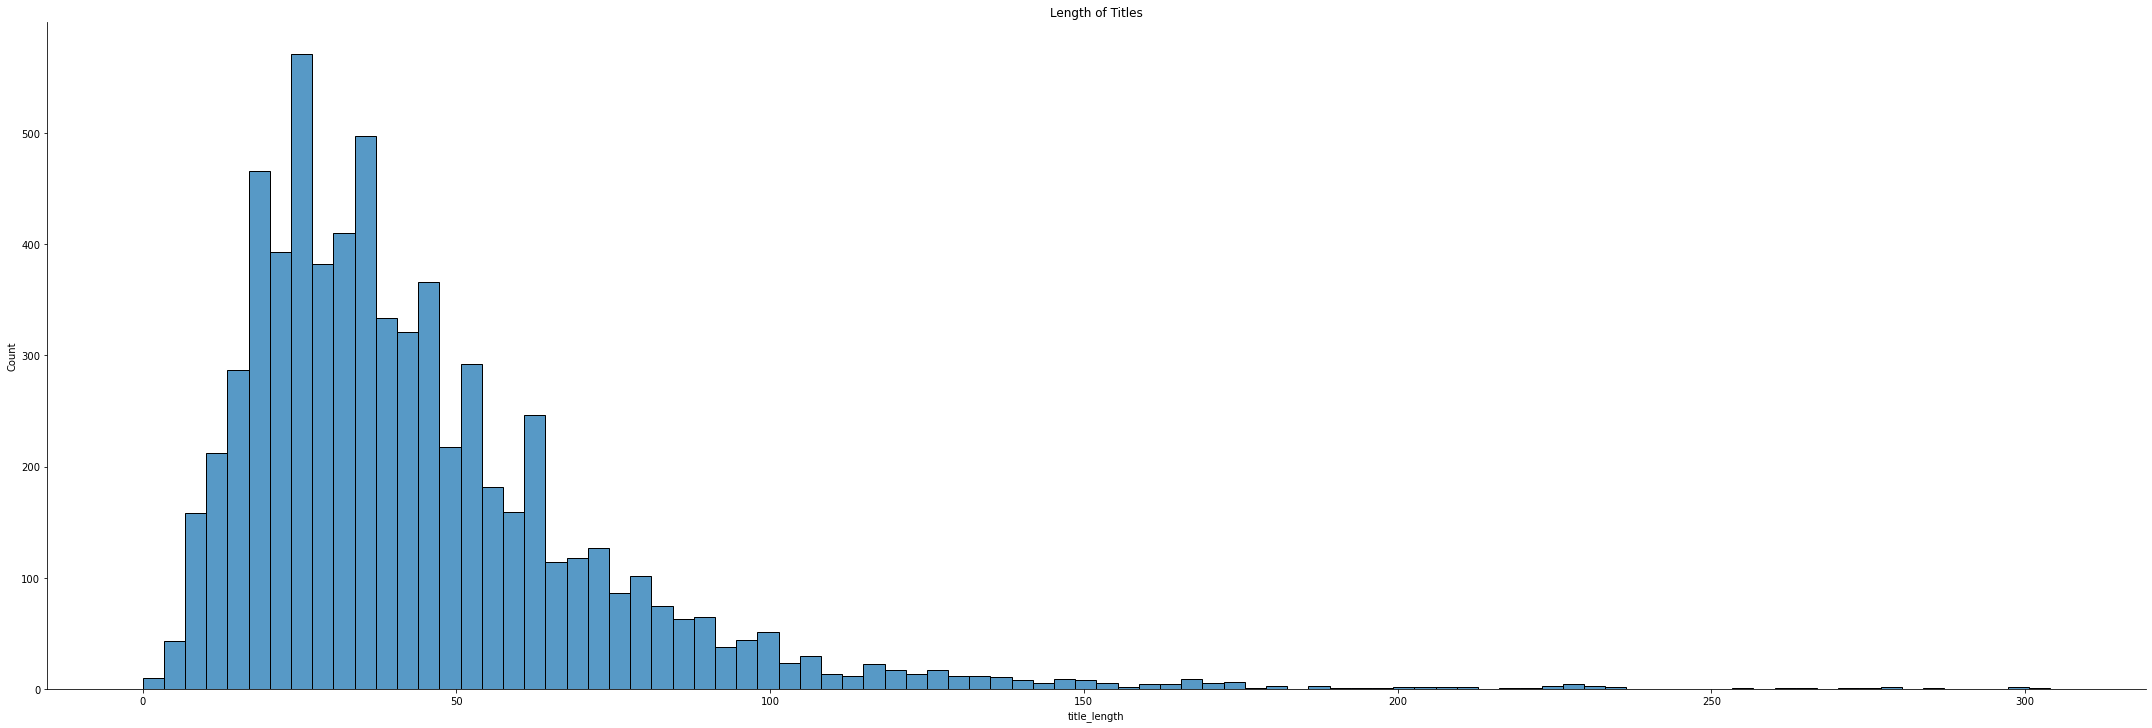

In [34]:
sns.displot(keto_vegan['title_length'], height=10, aspect=3)
plt.title('Length of Titles');

****Interpretation****: Right skewed. Outliers shown above 175 characters

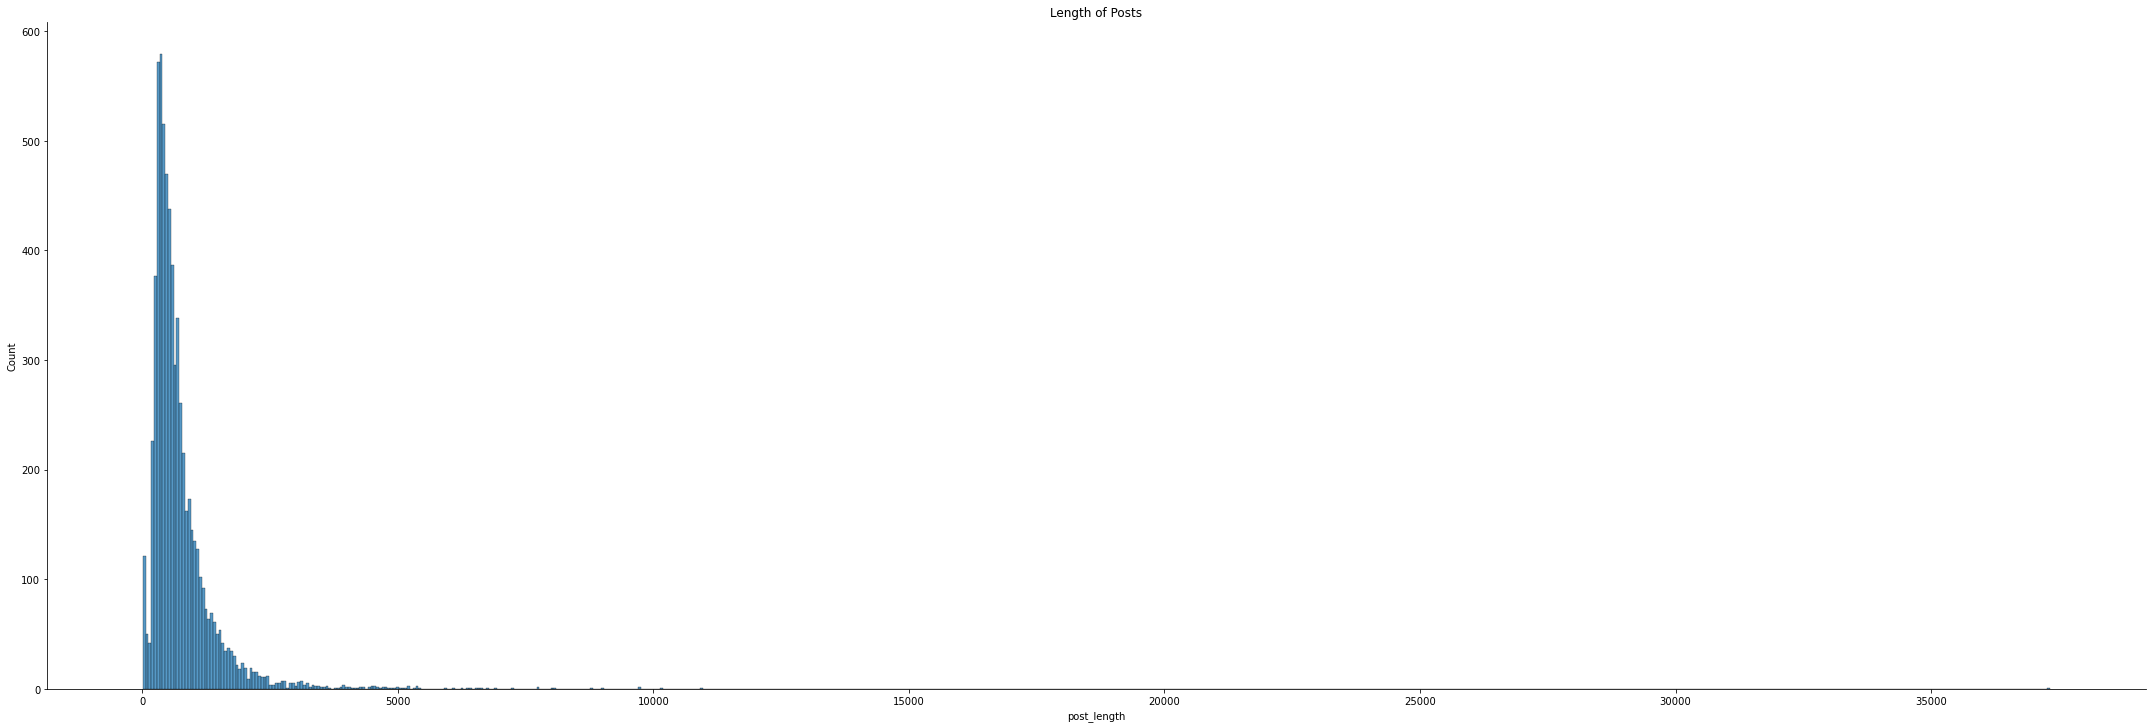

In [35]:
sns.displot(keto_vegan['post_length'], height=10, aspect=3)
plt.title('Length of Posts');

**Interpretation**: Right skewed. Outliers shown above 2,500 characters

In [36]:
keto_vegan.drop(keto_vegan[keto_vegan['title_length'] > 175].index, inplace=True)
keto_vegan.drop(keto_vegan[keto_vegan['post_length'] > 2_500].index, inplace=True)

**Cleaned data of outliers shown in distribution plots above.**

In [37]:
keto_vegan.describe()

,created_utc,title_length,post_length
count,6.467000e+03,6467.000000,6467.000000
mean,1.646790e+09,42.657337,669.241843
std,2.451901e+06,26.472960,437.489055
min,1.642424e+09,0.000000,9.000000
25%,1.644599e+09,24.000000,362.000000
50%,1.646824e+09,37.000000,546.000000
75%,1.648920e+09,55.000000,842.500000
max,1.651178e+09,174.000000,2489.000000


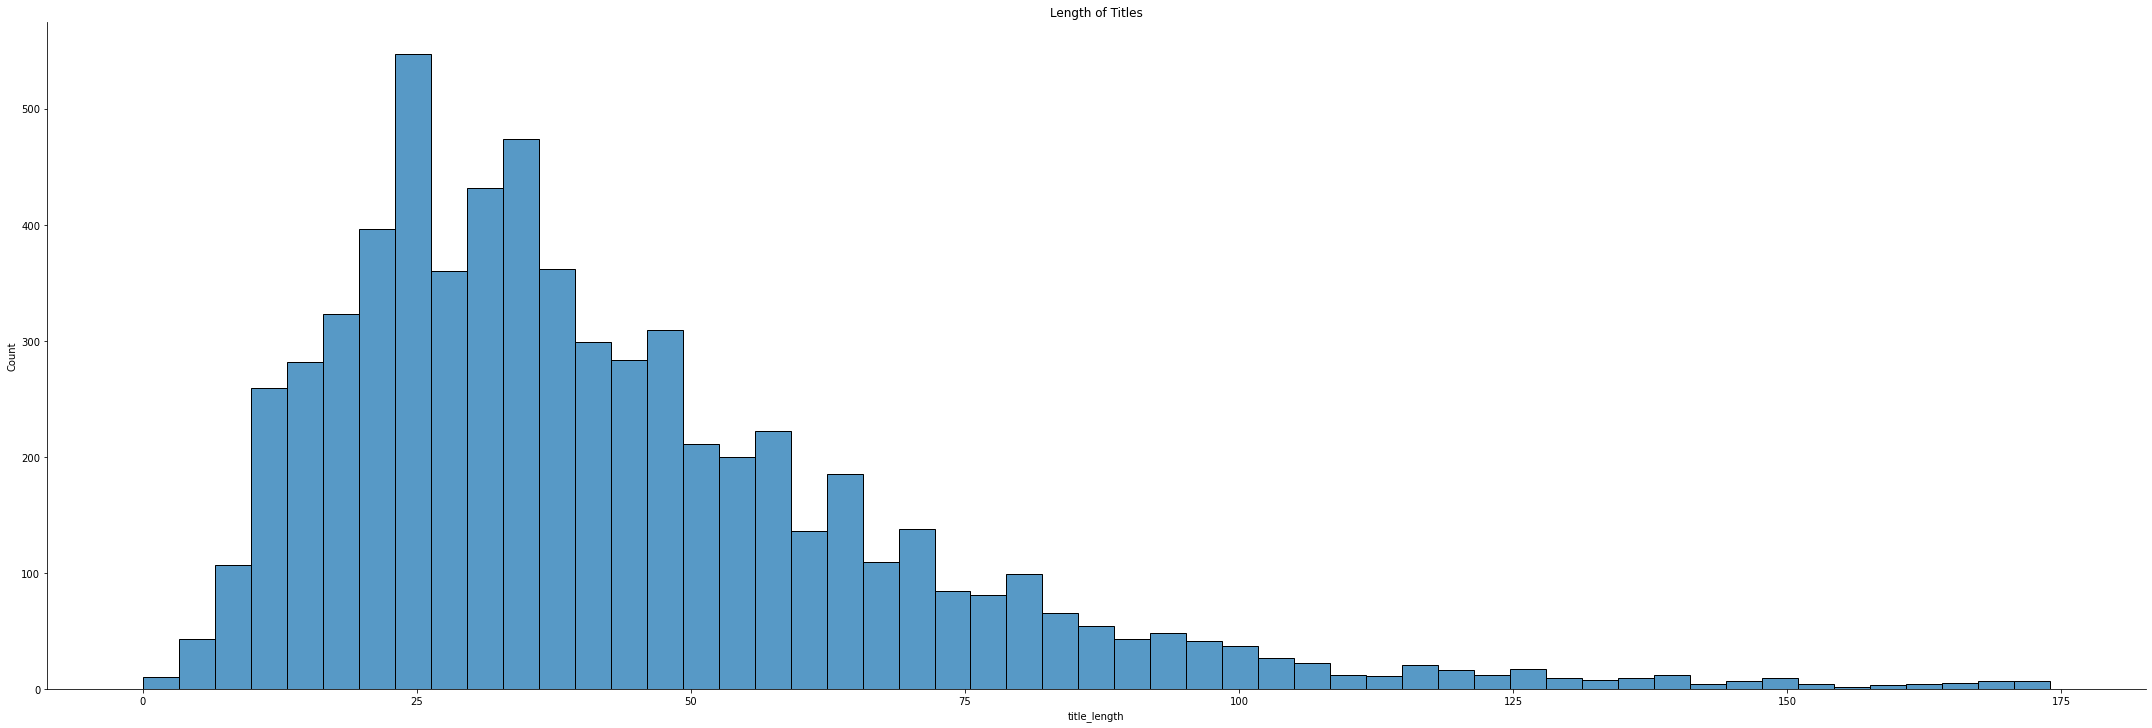

In [38]:
sns.displot(keto_vegan['title_length'], height=10, aspect=3)
plt.title('Length of Titles')
plt.savefig('figures/Length_Titles.png');

**Interpretation**: On average, titles were around 43 characters

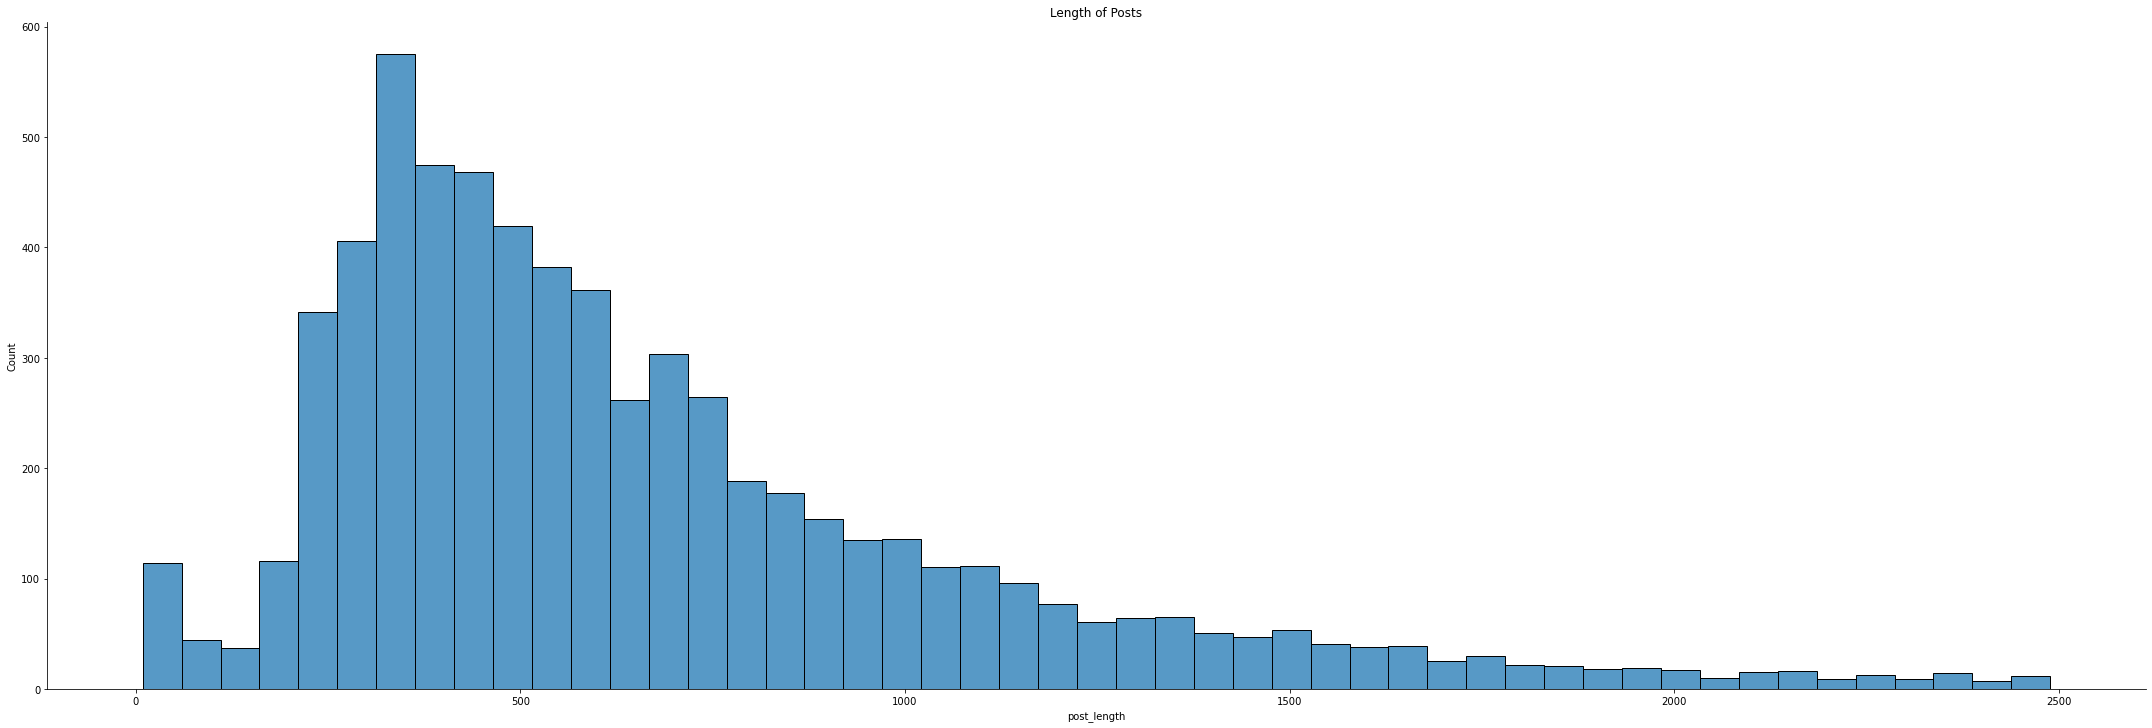

In [39]:
sns.displot(keto_vegan['post_length'], height=10, aspect=3)
plt.title('Length of Posts')
plt.savefig('figures/Length_Posts.png');

**Interpretation**: On average, posts were around 669 characters

In [40]:
keto_vegan.groupby(['subreddit'])[['title_length','post_length']].mean().round()

,title_length,post_length
subreddit,,
keto,39.0,626.0
vegan,47.0,718.0


****Interpretation****: On average, vegan titles and posts were longer than keto titles and posts

In [41]:
keto_vegan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 1 to 12095
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     6467 non-null   object
 1   title         6467 non-null   object
 2   selftext      6467 non-null   object
 3   created_utc   6467 non-null   int64 
 4   title_posts   6467 non-null   object
 5   title_length  6467 non-null   int64 
 6   post_length   6467 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 404.2+ KB


In [42]:
keto_vegan.to_csv('data/keto_vegan.csv', index=False)

In [43]:
cv_title = CountVectorizer(stop_words='english', ngram_range=(1,1), strip_accents='unicode', min_df=3)
cv_title_transf = cv_title.fit_transform(keto_vegan['title'])
cv_title_df = pd.DataFrame(cv_title_transf.toarray(),columns=cv_title.get_feature_names_out())
top25_titles = cv_title_df.sum().sort_values(ascending=False).head(25)
top25_titles.index

Index(['keto', 'vegan', 'help', 'diet', 'weight', 'need', 'food', 'eating',
       'question', 'meat', 'does', 'eat', 'veganism', 'just', 'vegans',
       'carbs', 'like', 'good', 'people', 'fat', 'protein', '2022', 'animal',
       'amp', 'feel'],
      dtype='object')

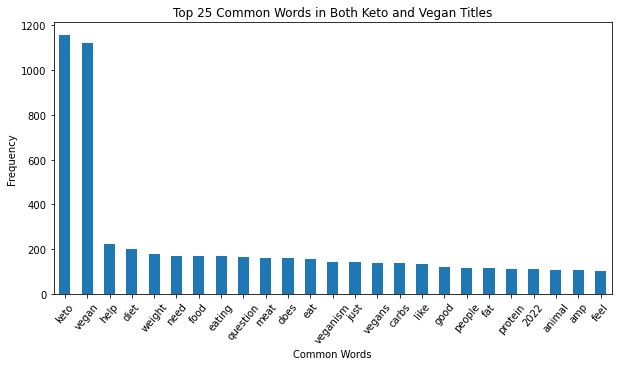

In [44]:
plt.figure(figsize=(10,5))
top25_titles.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words in Both Keto and Vegan Titles')
plt.savefig('figures/Top_25_Keto_Vegan_Titles.png');

**Interpretation**: Keto and Vegan are the most used word in the titles between the subreddits. Keto has a slightly higher frequency.

In [45]:
cv_posts = CountVectorizer(stop_words='english', ngram_range=(1,1), strip_accents='unicode', min_df=3)
cv_posts_transf = cv_posts.fit_transform(keto_vegan['selftext'])
cv_posts_df = pd.DataFrame(cv_posts_transf.toarray(),columns=cv_posts.get_feature_names_out())
top25_posts = cv_posts_df.sum().sort_values(ascending=False).head(25)
top25_posts.index

Index(['keto', 'vegan', 'just', 'like', 've', 'don', 'eat', 'know', 'day',
       'weight', 'eating', 'really', 'time', 'feel', 'diet', 'want', 'people',
       'food', 'carbs', 'meat', 'https', 'good', 'think', 'make', 'com'],
      dtype='object')

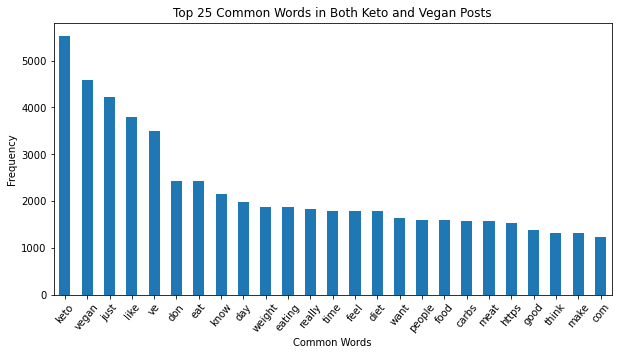

In [46]:
plt.figure(figsize=(10,5))
top25_posts.plot.bar()
plt.xlabel('Common Words')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.title('Top 25 Common Words in Both Keto and Vegan Posts')
plt.savefig('figures/Top_25_Keto_Vegan_Posts.png');

**Interpretation**: Keto and Vegan are the most used word in the posts between the subreddits. Keto has a  higher frequency.